In [1]:
from ase.io import read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path2dump = '/home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj'
# atoms = read(path2dump, index=0, format='lammps-dump-text')

In [3]:
from ovito.io import import_file
from ovito.io.ase import ovito_to_ase

# Import a sequence of files.
pipeline = import_file(path2dump)

ase_atoms_list = []

# Loop over all frames of the sequence.
for frame_index in range(pipeline.source.num_frames):

    # Calling FileSource.compute() loads the requested frame
    # from the sequence into memory and returns the data as a new
    # DataCollection:
    data = pipeline.source.compute(frame_index)
    ase_atoms = ovito_to_ase(data)
    ase_atoms_list.append(ase_atoms)

    # The source path and the index of the current frame
    # are attached as attributes to the data collection:
    print('Frame source:', data.attributes['SourceFile'])
    print('Frame index:', data.attributes['SourceFrame'])

/home/y1u0d2/anaconda3/envs/deepmd/lib/python3.10/site-packages/ovito/extensions/averaging.py:2: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? Note that this will likely lead to conflicts with existing libraries in the Anaconda environment, and loading of the OVITO module may subsequently fail with an error related to the Qt framework. In such a case, please uninstall the OVITO pip package first by running 'pip uninstall -y ovito PySide2 PySide6' and then install the OVITO for Anaconda package using the correct command: 

    conda install --strict-channel-priority -c https://conda.ovito.org -c conda-forge ovito

Visit https://www.ovito.org/python-downloads/ for further installation instructions. If you rather want to suppress this warning, insert the following code at the top of your Python script:

  import warnings
  warnings.filterwarnings('ignore', message='.*OVITO.*PyPI')



Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 0
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 1
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 2
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 3
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 4
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 5
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 6
Frame source: /home/y1u0d2/result/lammps/scripts/Si/sputtering/deepmd/model26/0deg_100eV/dump.lammpstrj
Frame index: 7
Frame source: /home/y1u0d2/result/lammps/scripts

In [4]:
atoms = ase_atoms_list[0]
coord = atoms.get_positions()
cell = atoms.get_cell()

In [5]:
atoms.symbols

Symbols('H6750')

(0.0, 95.02499999999999)

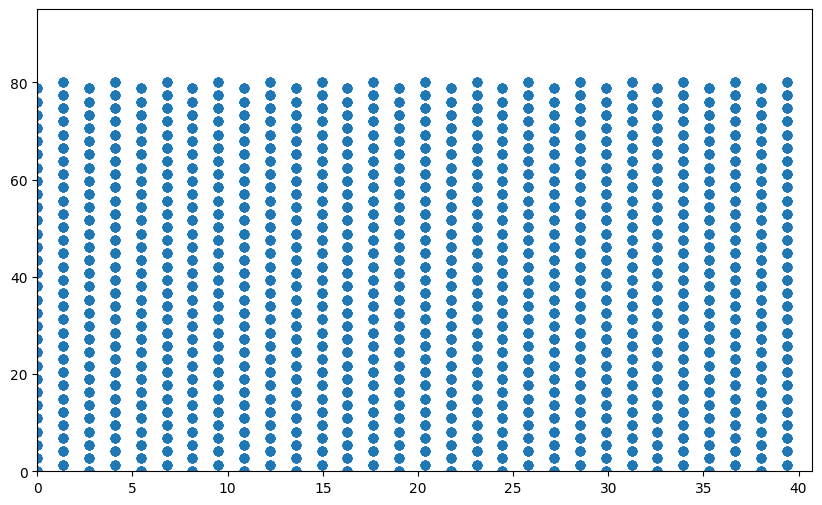

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.scatter(coord[:, 0], coord[:, 2])
ax.set_xlim(0, cell[0].max())
ax.set_ylim(0, cell[2].max())

In [7]:
from deepmd.infer import DeepPot

path2model = '/home/y1u0d2/result/deepmd/Si/27/graph.pb'
dp = DeepPot(path2model)
coord = atoms.get_positions().reshape([1, -1])
cell = atoms.cell[:].reshape([1, -1])
atype = np.zeros(len(atoms.numbers))
# e, f, v = dp.eval(coord, cell, atype)
a = dp.eval(coord, cell, atype)

Instructions for updating:
non-resource variables are not supported in the long term


/home/y1u0d2/anaconda3/envs/deepmd/lib/python3.10/importlib/__init__.py:169: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  _bootstrap._exec(spec, module)
2023-02-18 20:00:09.736726: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-18 20:00:09.933797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 20:00:09.934110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must

In [8]:
a

(array([[-4288323.8585924]]),
 array([[[-0.03372647, -0.03372647, -1.48334058],
         [ 0.02490756, -0.15156151,  0.09317846],
         [-0.15156151,  0.02490756,  0.09317846],
         ...,
         [-0.05922449, -0.05160916, -0.4588681 ],
         [ 1.1286047 ,  0.44383711,  0.58834692],
         [ 0.28516533,  0.28516533,  1.82064852]]]),
 array([[1762.76972171,  115.49331539, 1030.22718983,  115.49331539,
         1762.76972171, 1030.22718983, 1030.22718983, 1030.22718983,
         1473.67566495]]))

In [9]:
descriptor = dp.eval_descriptor(coord, cell, atype)

In [10]:
descriptor[0].shape

(6750, 1600)

<Axes: >

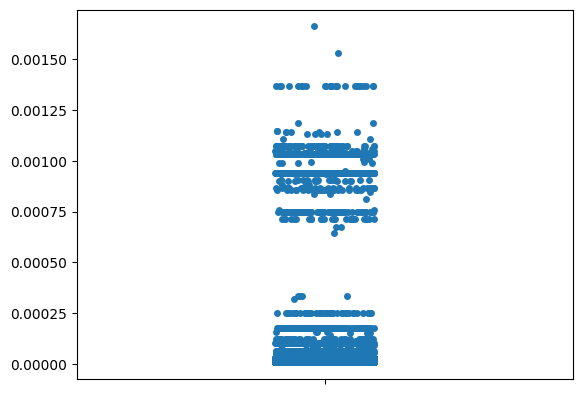

In [11]:
import seaborn as sns

sns.stripplot(data=descriptor[0][:, 0])

In [12]:
from deepmd.infer import DeepPot

path2model = '/home/y1u0d2/result/deepmd/Si/27/graph.pb'
dp = DeepPot(path2model)
# coord = atoms.get_positions().reshape([1, -1])
# cell = atoms.cell[:].reshape([1, -1])
# atype = np.zeros(len(atoms.numbers))
coord = np.array([[1,0,0], [0,0,1.5], [1,0,3]]).reshape([1, -1])
cell = np.diag(10 * np.ones(3)).reshape([1, -1])
atype = [0,0,0]
# e, f, v = dp.eval(coord, cell, atype)
descriptor = dp.eval_descriptor(coord, cell, atype)

2023-02-18 20:00:12.768375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 20:00:12.768760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 20:00:12.769043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 20:00:12.769312: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 20:00:12.769579: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [13]:
descriptor.shape

(1, 3, 1600)

In [14]:
descriptor[0][0]

array([ 9.18161750e-04, -1.44539111e-03,  1.39776281e-02, ...,
        9.36835650e-05, -1.41600958e-04,  2.98952420e-04])

In [15]:
from mlptools.io.read import read_from_lmp_dump

all_atoms = read_from_lmp_dump(path2dump)

Number of frames: 316


In [16]:
from mlptools.descriptor.dp import get_descriptor_vector, get_predictions

In [17]:
descriptor = get_descriptor_vector(all_atoms[0], path2model=path2model)
e, f, v = get_predictions(all_atoms[0], path2model=path2model)

2023-02-18 20:00:18.728719: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 20:00:18.729105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 20:00:18.729392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 20:00:18.729655: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 20:00:18.729950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

array([[1762.76972171,  115.49331539, 1030.22718983,  115.49331539,
        1762.76972171, 1030.22718983, 1030.22718983, 1030.22718983,
        1473.67566495]])